## Demo
This file provides an example on how to load the model and use it to classify a sample image.

In [1]:
import torch
from torchvision import transforms, models
from PIL import Image

#### Import model

ATTENTION: Do not forget to modify the last layer to the number of classes

In [4]:
import torch.nn as nn

# Load MobileNet model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.segmentation.deeplabv3_mobilenet_v3_large(pretrained=False)

# Modify the last layer to the number of classes
num_classes = 60
in_channels = model.classifier[4].in_channels
model.classifier[4] = nn.Conv2d(in_channels, num_classes, kernel_size=(1, 1))

model.load_state_dict(torch.load("segmentation.pth", map_location=device), strict=False)
model.eval()

C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_22632\1853241264.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary 

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride

#### Run inference
ATTENTION: Transform the image before passing it to the model!

In [5]:
# Define preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [15]:
# Load and preprocess the image
# Modify the image path to see how it makes inferences on other images
image = Image.open("data/batch_1/000003.jpg").convert("RGB")
input_tensor = transform(image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0]

output_predictions = torch.argmax(output, dim=0)

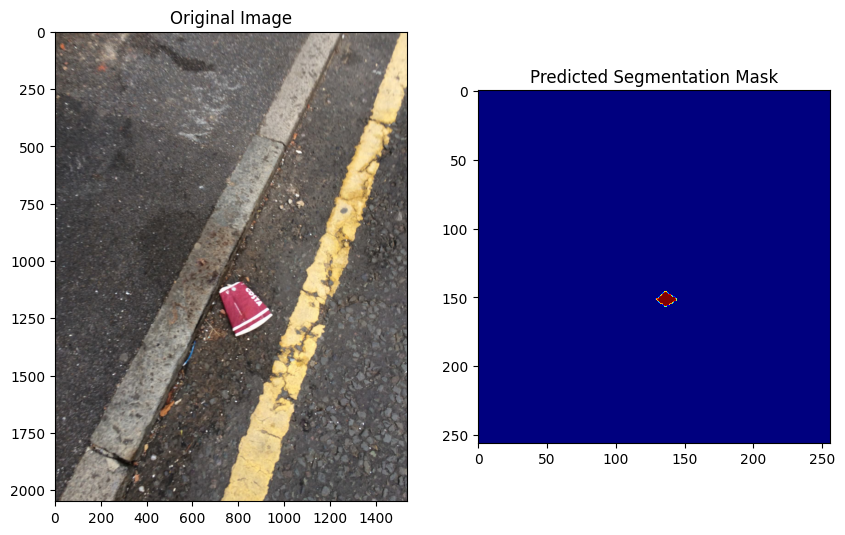

In [16]:
import matplotlib.pyplot as plt

# Visualize the segmentation mask
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Display the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(output_predictions, cmap='jet')
plt.title("Predicted Segmentation Mask")
plt.show()